In [1]:
import cv2
import numpy as np
import torch 
import pandas as pd 
import os
import matplotlib.pyplot as plt

In [2]:
weights_recog_path = 'model-2/yunet_s_640_640.onnx'
weights_detect_path = 'model-2/yunet_s_640_640.onnx'

In [3]:
from deepface import DeepFace

24-01-15 07:47:02 - Directory C:\Users\Danh Nguyen/.deepface created
24-01-15 07:47:02 - Directory C:\Users\Danh Nguyen/.deepface/weights created


In [20]:
test_image = cv2.imread('MyImageSet/nhi-t.png')

In [30]:
recognition = DeepFace.verify('E:/IOT/MyImageSet/danh-demo.jpg', 'E:/IOT/uihandle/db/image-data/Danhhai.png', model_name='VGG-Face', enforce_detection=False)

TypeError: verify() got an unexpected keyword argument 'weights_recog_path'

In [32]:
recognition['verified']

True

In [5]:
#test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

In [6]:
face_detector = cv2.FaceDetectorYN_create(weights_detect_path, "", (0,0))

In [22]:
###preprocess
test_image_proc = cv2.resize(test_image, (0,0), fx=500/test_image.shape[0], fy=500/test_image.shape[0])
height, width, _ = test_image.shape

In [23]:
test_image_proc.shape

(500, 641, 3)

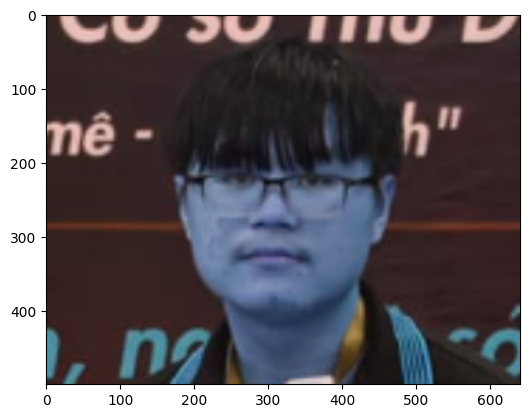

In [24]:
plt.imshow(test_image_proc)

In [25]:
face_detector.setInputSize((width, height))
_, result_detect = face_detector.detect(test_image)

In [26]:
faces = result_detect

In [27]:
faces = faces if faces is not None else []

In [28]:
faces

array([[49.692764 , 30.133533 , 67.54779  , 77.7707   , 67.60565  ,
        54.463577 , 96.515045 , 54.41233  , 79.869    , 69.67503  ,
        68.124886 , 84.33264  , 92.54078  , 83.480316 ,  0.9136458]],
      dtype=float32)

### Face Recog

In [30]:
huy_db = cv2.imread('uihandle/db/image-data/huy.png')

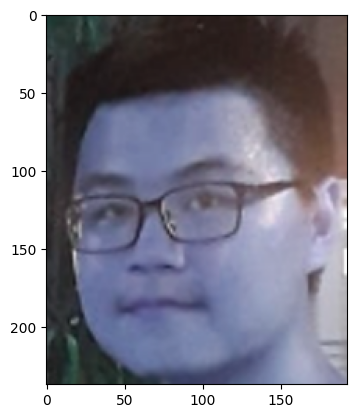

In [31]:
plt.imshow(huy_db)

In [33]:
db_image_proc = cv2.resize(huy_db, (0,0), fx=500/huy_db.shape[0], fy=500/huy_db.shape[0])
height, width, _ = db_image_proc.shape


In [34]:
db_image_proc.shape

(500, 407, 3)

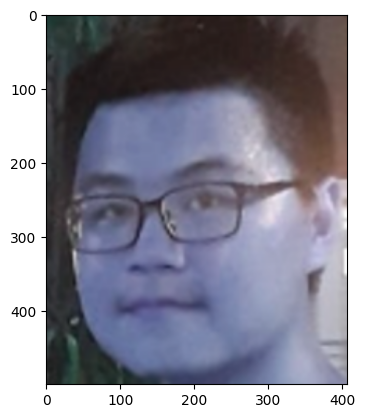

In [35]:
plt.imshow(db_image_proc)

In [36]:
face_detector.setInputSize((width, height))
_, face_detect_huy = face_detector.detect(db_image_proc)

In [37]:
face_recog = cv2.FaceRecognizerSF_create('model-2/face_recognizer_fast.onnx', "")

In [38]:
score = face_recog.match(face_detect_huy, result_detect, cv2.FACE_RECOGNIZER_SF_FR_NORM_L2)

In [39]:
score

0.4100155141055456

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, MaxPooling2D, \
                                    Dropout, Flatten, Activation


def get_model():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Conv2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

In [39]:
model = get_model()

In [41]:
model.load_weights(filepath='E:/IOT/vgg_face_weights.h5')

In [47]:
for i in range(len(model.layers[:-1])):
    model.layers[i].trainable = False

In [53]:
model_deep = DeepFace.build_model(model_name='Facenet')

24-01-15 09:06:49 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\Danh Nguyen\.deepface\weights\facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:12<00:00, 7.56MB/s]


In [64]:
import tensorflow as tf
test_imaga = tf.keras.preprocessing.image.load_img('E:/IOT/MyImageSet/danh-demo.jpg', target_size=(160, 160))
test_imaga = tf.keras.preprocessing.image.img_to_array(test_imaga)
expand_imaga = np.expand_dims(test_imaga, axis=0)

expand_imaga /= 255

In [72]:

test_imaga = tf.keras.preprocessing.image.load_img('E:/IOT/uihandle/db/image-data/huy.png', target_size=(160, 160))
test_imaga = tf.keras.preprocessing.image.img_to_array(test_imaga)
db_img = np.expand_dims(test_imaga, axis=0)

db_img /= 255

In [73]:
encode_test = model_deep.predict(expand_imaga)
encode_res = model_deep.predict(db_img)

1/1 [==============================] - 0s 58ms/step


(1, 128)

In [74]:
from scipy.spatial.distance import cosine
arr1_normalized = encode_test / np.linalg.norm(encode_test)
arr2_normalized = encode_res / np.linalg.norm(encode_res)

cosine_distance_normalized = cosine(encode_test.flatten(), encode_res.flatten())
print(f"Normalized Cosine Distance: {cosine_distance_normalized}")

Normalized Cosine Distance: 0.637264758348465


In [75]:
model_deep.save('my_model_recog.h5')

In [76]:
load_recog_model = tf.keras.models.load_model('my_model_recog.h5')

In [77]:
load_recog_model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv2d_1a_3x3 (Conv2D)      (None, 79, 79, 32)           864       ['input_1[0][0]']             
                                                                                                  
 Conv2d_1a_3x3_BatchNorm (B  (None, 79, 79, 32)           96        ['Conv2d_1a_3x3[0][0]']       
 atchNormalization)                                                                               
                                                                                                  
 Conv2d_1a_3x3_Activation (  (None, 79, 79, 32)           0         ['Conv2d_1a_